# VEST VA 2017 Governor, Lt Governor, Attorney General

In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)

## Load VEST file

In [9]:
gdfv = gp.read_file('./raw_from_source/va_2017/va_2017.shp')
gdfv.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,geometry
0,001,Accomack County,000101,Chincoteague,455,784,11,0,410,829,0,416,815,2,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,144,414,1,0,137,414,0,132,422,0,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,225,468,8,0,222,471,0,216,477,0,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,395,383,5,0,386,389,1,384,393,1,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,103,232,1,0,89,239,0,92,236,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."


In [10]:
county_dict = pd.Series(gdfv['COUNTYFP'].values, index = gdfv['LOCALITY']).to_dict()

## Load election results

In [11]:
#Governor
gov = pd.read_csv('./raw_from_source/Virginia_Elections_Database__2017_Governor_General_Election_including_precincts.csv')
#Lt Gov
ltg = pd.read_csv('./raw_from_source/Virginia_Elections_Database__2017_Lieutenant_Governor_General_Election_including_precincts.csv')
#Attorney General
atg = pd.read_csv('./raw_from_source/Virginia_Elections_Database__2017_Attorney_General_General_Election_including_precincts.csv')

gov['join_id'] = gov['County/City']+gov['Pct']
ltg['join_id']= ltg['County/City']+ltg['Pct']
atg['join_id'] = atg['County/City']+atg['Pct']

gov_ltg = pd.merge(gov, ltg, on = 'join_id', how = 'outer')
df = pd.merge(atg, gov_ltg, on = 'join_id', how = 'outer')

df.columns

Index(['County/City', 'Ward', 'Pct', 'Mark Rankin Herring',
       'John Donley Adams', 'All Others', 'Total Votes Cast', 'join_id',
       'County/City_x', 'Ward_x', 'Pct_x', 'Ralph Shearer Northam',
       'Edward Walter Gillespie', 'Clifford Daniel Hyra', 'All Others_x',
       'Total Votes Cast_x', 'County/City_y', 'Ward_y', 'Pct_y',
       'Justin Edward Fairfax', 'Jill Holtzman Vogel', 'All Others_y',
       'Total Votes Cast_y'],
      dtype='object')

In [12]:
df = df.fillna(value = 0)
df = df[(df['County/City'] != 'TOTALS') & (df['join_id'] != 0)]
df['LOCALITY'] = df['County/City']
#Import county fip number values
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)
#Change columns to match vest candidate ids
df['G17GOVDNOR'] = df['Ralph Shearer Northam'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int) 
df['G17GOVDNOR'] = df['Ralph Shearer Northam'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17GOVRGIL'] = df['Edward Walter Gillespie'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17GOVLHYR'] = df['Clifford Daniel Hyra'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17GOVOWRI'] = df['All Others_x'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

df['G17LTGDFAI'] = df['Justin Edward Fairfax'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17LTGRVOG'] = df['Jill Holtzman Vogel'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17LTGOWRI'] = df['All Others_y'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

df['G17ATGDHER'] = df['Mark Rankin Herring'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17ATGRADA'] = df['John Donley Adams'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df['G17ATGOWRI'] = df['All Others'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
#drop repeat columns
df = df.drop(['County/City_x', 'Ward_x', 'Total Votes Cast_x','County/City_y', 'Ward_y', 'Total Votes Cast_y',
             'Ralph Shearer Northam','Edward Walter Gillespie','Clifford Daniel Hyra','All Others_x','Justin Edward Fairfax','Jill Holtzman Vogel','All Others_y',
             'Mark Rankin Herring','John Donley Adams','All Others', 'Pct_x', 'Pct_y'], axis = 1)

In [13]:
df.head()

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY,COUNTYFP,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI
8,Accomack County,-,101 - Chincoteague,"1,152",Accomack County101 - Chincoteague,Accomack County,001,411,746,10,0,369,789,0,374,776,2
9,Accomack County,-,201 - Atlantic,521,Accomack County201 - Atlantic,Accomack County,001,130,394,1,0,123,394,0,119,402,0
10,Accomack County,-,202 - Greenbackville,648,Accomack County202 - Greenbackville,Accomack County,001,203,445,7,0,200,448,0,194,454,0
11,Accomack County,-,301 - New Church,721,Accomack County301 - New Church,Accomack County,001,357,365,4,0,347,370,1,346,374,1
12,Accomack County,-,401 - Bloxom,308,Accomack County401 - Bloxom,Accomack County,001,93,221,1,0,80,227,0,83,225,0


### Check vote totals - pre absentee reallocation

In [14]:
#column/race
column_list = ['G17GOVDNOR', 'G17GOVRGIL', 'G17GOVLHYR', 'G17GOVOWRI', 'G17LTGDFAI', 'G17LTGRVOG', 'G17LTGOWRI','G17ATGDHER', 'G17ATGRADA', 'G17ATGOWRI']
for val in column_list:
    vote_dif = df[val].sum()-gdfv[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

G17GOVDNOR: EQUAL
G17GOVRGIL: EQUAL
G17GOVLHYR: EQUAL
G17GOVOWRI: EQUAL
G17LTGDFAI: EQUAL
G17LTGRVOG: EQUAL
G17LTGOWRI: EQUAL
G17ATGDHER: EQUAL
G17ATGRADA: EQUAL
G17ATGOWRI: EQUAL


In [15]:
#county
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['LOCALITY']).sum()[i]-gdfv.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Absentee reallocation

In [16]:
#Function to account for counties split by CDs in absentee reallocation to better match VEST's steps
def add_cd_to_county(county_list, precinct, countyfp):
    if (countyfp in county_list):
        countyfp_cd = countyfp + '-' + precinct[-5:-1]
        return countyfp_cd
    else:
        countyfp_cd = countyfp
        return countyfp_cd
#Set-up for absentee reallocation
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])

df['countyfp_cd'] = df.apply(lambda row: add_cd_to_county(county_with_cd_nec_list, row['Pct'], row['COUNTYFP']), axis = 1)

absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()

groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [17]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

#Create copys of subset dfs to not modify in case want to check back later
to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["countyfp_cd"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["countyfp_cd"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(["countyfp_cd"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["countyfp_cd"].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated["countyfp_cd"]==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

### Check vote totals - post absentee reallocation

In [21]:
#Column/race total check
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-gdfv[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL - "+ str(df_with_absentee_reallocated[val].sum()))
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
print("Columns with differences printed below:")

G17GOVDNOR: EQUAL - 1408818.0
G17GOVRGIL: EQUAL - 1175732.0
G17GOVLHYR: EQUAL - 27987.0
G17GOVOWRI: EQUAL - 1528.0
G17LTGDFAI: EQUAL - 1368412.0
G17LTGRVOG: EQUAL - 1224520.0
G17LTGOWRI: EQUAL - 2606.0
G17ATGDHER: EQUAL - 1385390.0
G17ATGRADA: EQUAL - 1209540.0
G17ATGOWRI: EQUAL - 2614.0
Columns with differences printed below:


In [19]:
#Differences between RDH/Partner total and VA Dept of Elections totals
one = 1409175 - 1408818.0
two = 1175731 - 1175732.0
three = 27987 - 27987.0
four = 1389 - 1528.0
five = 1368261 - 1368412.0
six = 1224519 - 1224520.0
seven = 2446 - 2606.0
eight = 1385389 - 1385390.0
nine = 1209339 - 1209540.0
ten = 2486 - 2614.0

print(one, two, three, four, five, six, seven, eight, nine, ten)

357.0 -1.0 0.0 -139.0 -151.0 -1.0 -160.0 -1.0 -201.0 -128.0


In [20]:
#County total check
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(["LOCALITY"]).sum()[i]-gdfv.groupby(["LOCALITY"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")


All other races in all counties are equal


## Unique Identifier to enable merge between election results and vest file

In [22]:
#Rely on VTDST code from vest file, and subset code from election results precinct column
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [23]:
#Isolating 3 digit VTDST code in election results as it appears in the shapefile and vest file, then creating unique id
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']
gdfv['unique_id'] = gdfv['COUNTYFP'] + gdfv['VTDST'].str.slice(start = 3)

print('id in vest file not in df: ', set(gdfv['unique_id']) - set(df_with_absentee_reallocated['unique_id']))
print('id in df not in vest file: ', set(df_with_absentee_reallocated['unique_id']) - set(gdfv['unique_id']))

id in vest file not in df:  {'059700', '770021'}
id in df not in vest file:  set()


In [24]:
double_in_df = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = double_in_df[double_in_df > 1].index
double_in_vest = gdfv['unique_id'].value_counts()
vest_double_list = double_in_vest[double_in_vest > 1].index
print('doubled in vest file not doubled in df',set(vest_double_list) - set(df_double_list))
print('doubled in df not doubled in vest file', set(df_double_list) - set(vest_double_list))

doubled in vest file not doubled in df set()
doubled in df not doubled in vest file {'770018'}


In [26]:
#Number of "unique" values that are not unique - they are doubled and need to be made unique
df_double_list.shape

(24,)

### Add cd to unique_id to add uniqueness to the doubled ids in vest file and election results df

In [27]:
gdfv[gdfv['unique_id'].isin(df_double_list)].head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,geometry,unique_id
1790,650,Hampton City,000215,TYLER (CD 3),279,71,1,0,273,75,0,276,74,0,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215
2207,550,Chesapeake City,000020,E W Chittum (CD 4),670,810,9,1,636,849,2,660,828,1,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020
2208,550,Chesapeake City,000020,E W Chittum (CD 3),4,9,0,0,4,9,0,4,9,0,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020
2209,059,Fairfax County,000513,Saint Albans (CD 8),361,162,2,0,361,162,0,356,167,0,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513
2210,059,Fairfax County,000513,Saint Albans (CD 11),675,276,5,0,675,275,2,663,289,0,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513


In [28]:
gdfv['old_unique_id'] = gdfv['unique_id']
df_with_absentee_reallocated['old_unique_id'] = df_with_absentee_reallocated['unique_id']

gdfv['cd'] = gdfv['PRECINCT'].str.slice(start=-3, stop=-1)
df_with_absentee_reallocated['cd'] = df_with_absentee_reallocated['Pct'].str.slice(start=-3, stop=-1)

gdfv['id_w_cd'] = gdfv['unique_id']+'-'+gdfv['cd']
df_with_absentee_reallocated['id_w_cd'] = df_with_absentee_reallocated['unique_id']+'-'+df_with_absentee_reallocated['cd']

gdfv.loc[gdfv['unique_id'].isin(df_double_list), 'unique_id'] = gdfv.loc[gdfv['unique_id'].isin(df_double_list), 'id_w_cd']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'unique_id'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'id_w_cd']

In [30]:
df_with_absentee_reallocated[['old_unique_id', 'unique_id']][df_with_absentee_reallocated['old_unique_id'].isin(df_double_list)].head()

,old_unique_id,unique_id
430,550020,550020- 3
431,550020,550020- 4
792,059513,059513-11
793,059513,059513- 8
1162,650215,650215- 2


## Join attempt 1 - election results to vest to check precinct totals

In [31]:
join_1_df_vest = pd.merge(df_with_absentee_reallocated, gdfv, on = 'unique_id', how = 'outer', indicator = True)

In [32]:
print(join_1_df_vest["_merge"].value_counts())

both          2461
right_only       2
left_only        1
Name: _merge, dtype: int64


In [33]:
gdfv.shape

(2463, 19)

In [34]:
df_with_absentee_reallocated.shape

(2462, 53)

See in election results comparison (validation run 1) that the only mismatch > 1 is in Roanoke City - check out and compare:

In [35]:
join_1_df_vest[join_1_df_vest["_merge"]=="left_only"]

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2011,Roanoke City,-,18 - Summit Hills,"1,052",Roanoke City18 - Summit Hills,Roanoke City,770,680.0,426.0,14.0,0.0,670.0,441.0,0.0,674.0,436.0,0.0,770,37.0,0.639972,36.0,21.0,0.887154,20.0,0.0,0.472393,0.0,0.0,0.0,0.0,37.0,0.126506,37.0,21.0,0.483324,20.0,0.0,0.0,0.0,37.0,0.483752,36.0,21.0,0.968721,20.0,0.0,0.0,0.0,018,770018-ll,770018,ll,770018-ll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,left_only


In [36]:
join_1_df_vest[join_1_df_vest["_merge"]=="right_only"]

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,059700,NaN,NaN,NaN,059,Fairfax County,000700,Fairfax Court,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,ur,059700-ur,right_only
2463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770021,NaN,NaN,NaN,770,Roanoke City,000021,Eureka Park,1267.0,81.0,3.0,2.0,1252.0,85.0,0.0,1243.0,93.0,0.0,"POLYGON Z ((-79.99974 37.29491 0.00000, -79.99...",770021,ar,770021-ar,right_only


In [37]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '770020']

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY,COUNTYFP,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id,cd,id_w_cd
2258,Roanoke City,-,20 - Eureka Park,"1,265",Roanoke City20 - Eureka Park,Roanoke City,770,1267.0,81.0,3.0,2.0,1252.0,85.0,0.0,1243.0,93.0,0.0,770,68.0,0.322436,68.0,4.0,0.971138,3.0,0.0,0.101227,0.0,0.0,0.25,0.0,69.0,0.384924,69.0,4.0,0.950355,3.0,0.0,0.0,0.0,67.0,0.354619,67.0,4.0,0.496907,4.0,0.0,0.0,0.0,020,770020,770020,ar,770020-ar


In [38]:
gdfv[gdfv['unique_id'] == '770019']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,geometry,unique_id,old_unique_id,cd,id_w_cd
2311,770,Roanoke City,000019,Summit Hills,680,426,14,0,670,441,0,674,436,0,"POLYGON Z ((-80.00955 37.27925 0.00000, -80.01...",770019,770019,ll,770019-ll


In [39]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '770019']

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY,COUNTYFP,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id,cd,id_w_cd
2257,Roanoke City,-,19 - Forest Park,525,Roanoke City19 - Forest Park,Roanoke City,770,486.0,59.0,8.0,0.0,490.0,61.0,0.0,493.0,62.0,0.0,770,26.0,0.212111,26.0,3.0,0.8881,2.0,0.0,0.269939,0.0,0.0,0.0,0.0,27.0,0.155723,27.0,3.0,0.82865,2.0,0.0,0.0,0.0,27.0,0.689841,26.0,3.0,0.981095,2.0,0.0,0.0,0.0,019,770019,770019,ar,770019-ar


In [40]:
gdfv[gdfv['unique_id'] == '770020']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G17GOVDNOR,G17GOVRGIL,G17GOVLHYR,G17GOVOWRI,G17LTGDFAI,G17LTGRVOG,G17LTGOWRI,G17ATGDHER,G17ATGRADA,G17ATGOWRI,geometry,unique_id,old_unique_id,cd,id_w_cd
2312,770,Roanoke City,000020,Forest Park,487,59,8,0,490,61,0,493,62,0,"POLYGON Z ((-79.97599 37.29078 0.00000, -79.97...",770020,770020,ar,770020-ar


**Modifications to create match**

Election results df `770019` = gdfv `770020`

Election results df `770020` != gdfv `770019` -- why are df `770020` election results so off?

Election results df `770018` = gdfv `770019`

Election results df `770020` = gdfv `770021`

### Make modifications based on first join attempt

In [41]:
#Fix Roanoke City
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['old_unique_id']=='770019', 'unique_id'] = '770020'
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['old_unique_id']=='770018', 'unique_id'] = '770019'
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['old_unique_id']=='770020', 'unique_id'] = '770021'

## Join attempt 2 - election results to vest 

In [42]:
join_2_df_vest = pd.merge(df_with_absentee_reallocated, gdfv, on = 'unique_id', how = 'outer', indicator = True)

In [43]:
print(join_2_df_vest["_merge"].value_counts())

both          2462
right_only       2
left_only        0
Name: _merge, dtype: int64


In [44]:
join_2_df_vest[join_2_df_vest["_merge"]=="right_only"]

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,059700,NaN,NaN,NaN,059,Fairfax County,000700,Fairfax Court,0,0,0,0,0,0,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,ur,059700-ur,right_only
2463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770018-ic,NaN,NaN,NaN,770,Roanoke City,000018,Virginia Heights-Norwich,924,286,23,0,920,301,0,924,294,1,"POLYGON Z ((-79.98590 37.26255 0.00000, -79.98...",770018,ic,770018-ic,right_only


After running validation on Join attempt 2, `770019` still has issues

In [45]:
join_2_df_vest[join_2_df_vest['unique_id']=='770019']

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2010,Roanoke City,-,18 - Old To Be Removed Virginia Heights-Norwich,"1,155",Roanoke City18 - Old To Be Removed Virginia He...,Roanoke City,770,924.0,286.0,23.0,0.0,920.0,301.0,0.0,924.0,294.0,1.0,770,50.0,0.803010,49.0,14.0,0.027916,14.0,1.0,0.742331,0.0,0.0,0.0,0.0,51.0,0.968300,50.0,14.0,0.996938,13.0,0.0,0.0,0.0,50.0,0.057770,50.0,14.0,0.147571,14.0,0.0,0.058824,0.0,018,770019,770018,ic,770018-ic,770,Roanoke City,000019,Summit Hills,680,426,14,0,670,441,0,674,436,0,"POLYGON Z ((-80.00955 37.27925 0.00000, -80.01...",770019,ll,770019-ll,both
2011,Roanoke City,-,18 - Summit Hills,"1,052",Roanoke City18 - Summit Hills,Roanoke City,770,680.0,426.0,14.0,0.0,670.0,441.0,0.0,674.0,436.0,0.0,770,37.0,0.639972,36.0,21.0,0.887154,20.0,0.0,0.472393,0.0,0.0,0.0,0.0,37.0,0.126506,37.0,21.0,0.483324,20.0,0.0,0.0,0.0,37.0,0.483752,36.0,21.0,0.968721,20.0,0.0,0.000000,0.0,018,770019,770018,ll,770018-ll,770,Roanoke City,000019,Summit Hills,680,426,14,0,670,441,0,674,436,0,"POLYGON Z ((-80.00955 37.27925 0.00000, -80.01...",770019,ll,770019-ll,both


In [46]:
#Run modification to better match results
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['id_w_cd']=='770018-ic', 'unique_id']='770018'

## Join attempt 3 - election results to vest

In [47]:
join_3_df_vest = pd.merge(df_with_absentee_reallocated, gdfv, on = 'unique_id', how = 'outer', indicator = True)

In [48]:
print(join_3_df_vest["_merge"].value_counts())

both          2461
right_only       2
left_only        1
Name: _merge, dtype: int64


In [49]:
join_3_df_vest[join_3_df_vest["_merge"]=="left_only"]

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2010,Roanoke City,-,18 - Old To Be Removed Virginia Heights-Norwich,"1,155",Roanoke City18 - Old To Be Removed Virginia He...,Roanoke City,770,924.0,286.0,23.0,0.0,920.0,301.0,0.0,924.0,294.0,1.0,770,50.0,0.80301,49.0,14.0,0.027916,14.0,1.0,0.742331,0.0,0.0,0.0,0.0,51.0,0.9683,50.0,14.0,0.996938,13.0,0.0,0.0,0.0,50.0,0.05777,50.0,14.0,0.147571,14.0,0.0,0.058824,0.0,018,770018,770018,ic,770018-ic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,left_only


In [50]:
join_3_df_vest[join_3_df_vest["_merge"]=="right_only"]

,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_x,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,unique_id,old_unique_id_x,cd_x,id_w_cd_x,COUNTYFP_y,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry,old_unique_id_y,cd_y,id_w_cd_y,_merge
2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,059700,NaN,NaN,NaN,059,Fairfax County,000700,Fairfax Court,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,ur,059700-ur,right_only
2463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770018-ic,NaN,NaN,NaN,770,Roanoke City,000018,Virginia Heights-Norwich,924.0,286.0,23.0,0.0,920.0,301.0,0.0,924.0,294.0,1.0,"POLYGON Z ((-79.98590 37.26255 0.00000, -79.98...",770018,ic,770018-ic,right_only


unique id for `770018` listing differently on left and right side, but can see that election results match, and the one precinct - `Fairfax Court` aka `059700` that only appears in VEST's file, not the election results, is a zero vote precinct so does not impact the election results validation. - so, overall great match!

### Preliminary precinct level election result comparison

In [51]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>1): #7/12/21 LF mod to be >1 instead of >0 to print fewer results
                    print(i, "{:.>72}".format(df.iloc[j]["unique_id"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_id"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_id"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    #print(diff_list)

In [52]:
validater_row(join_3_df_vest[join_3_df_vest['_merge'] == 'both'].sort_values("unique_id"),column_list)


There are  2461  total rows
1601  of these rows have election result differences
860  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10


## Precinct Shapefile

<AxesSubplot:>

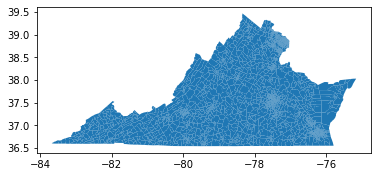

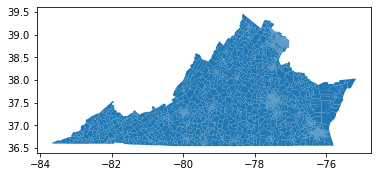

In [54]:
county_fips = []
for directory in os.listdir('./raw_from_source/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = gdfv.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './raw_from_source/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gp.read_file(vtd_ref)
    county_vtds.append(vtd_shp)

global shp
shp = gp.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

shp.plot()
gdfv.plot()

In [57]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)
print('preliminary id in shp not in vest: ', len((set(shp['unique_id']) - set(gdfv['unique_id']))), 'shp length:', shp.shape[0])
print('preliminary id in vest not in shp: ', len((set(gdfv['unique_id']) - set(shp['unique_id']))), 'vest length', gdfv.shape[0])

preliminary id in shp not in vest:  63 shp length: 2462
preliminary id in vest not in shp:  65 vest length 2463


### CD Shapefile - Load in CD info to make splits to match VEST

<AxesSubplot:>

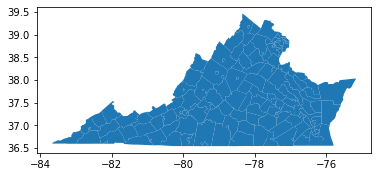

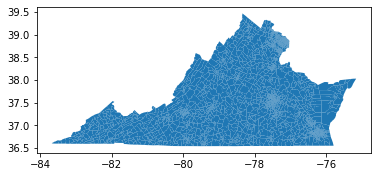

In [59]:
county_cd = []

for i in county_fips:
    ref = './raw_from_source/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gp.read_file(cd_ref)
    county_cd.append(cd_shp)
global cd
cd = gp.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 

cd.plot()
overlay = gp.overlay(cd, shp, how = 'union', make_valid = True, keep_geom_type = True)
overlay.plot()

In [60]:
overlay_w_shp = gp.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp['old_unique_id'] = overlay_w_shp['unique_id']

overlay_w_shp['id_w_cd'] = overlay_w_shp['unique_id'] + '- ' +overlay_w_shp['CDFP'].str.lstrip('0')

overlay_w_shp.loc[overlay_w_shp['old_unique_id'].isin(df_double_list), 'unique_id'] = overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'id_w_cd']

<ipython-input-60-e958bf8addeb>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gp.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


In [61]:
#overlay_w_shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)
print('preliminary id in overlay not in vest: ', len((set(overlay_w_shp['unique_id']) - set(gdfv['unique_id']))), 'overlay length:', shp.shape[0])
print('preliminary id in vest not in overlay: ', len((set(gdfv['unique_id']) - set(overlay_w_shp['unique_id']))), 'vest length', gdfv.shape[0])

preliminary id in overlay not in vest:  47 overlay length: 2462
preliminary id in vest not in overlay:  27 vest length 2463


In [62]:
join_overlay = pd.merge(gdfv, overlay_w_shp, on = 'unique_id', how = 'outer', indicator = True)
print(join_overlay["_merge"].value_counts())

both          2497
right_only      50
left_only       27
Name: _merge, dtype: int64


In [64]:
left_only = join_overlay[join_overlay["_merge"]=="left_only"]
right_only = join_overlay[join_overlay["_merge"]=="right_only"]
left_only.to_csv("./gdfv1_only.csv")
right_only.to_csv("./overlay_only.csv")

Hand matched in Excel using the csvs and precinct names to determine what needs to be merged versus split.

### Modify overlay to match gdfv based on hand matching in Excel

In [66]:
#Dict based on Excel hand matching
overlay_to_gdf_dict = {"520041":"520004",
"520042":"520004",
"077011":"077401",
"077012":"077401",
"035401":"035405",
"095041":"095104",
"095042":"095104",
"153112- 10":"153112-10",
"059513- 11":"059513-11",
"153061":"153106",
"153062":"153106",
"685031":"685003",
"685032":"685003",               
"153110- 10":"153110-10",
"153210- 10":"153210-10",
"153210- 11":"153210-11",
"153312- 11":"153312-11",
"153609- 11":"153609-11"}

In [67]:
#Apply dictionary to improve match rate
overlay_w_shp['old_unique_id_w_cd'] = overlay_w_shp['unique_id']
overlay_w_shp.loc[overlay_w_shp['old_unique_id_w_cd'].isin(overlay_to_gdf_dict.keys()), 'unique_id'] = overlay_w_shp['old_unique_id_w_cd'].map(overlay_to_gdf_dict)
#clean up geometry columns
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']
#Dissolve meaning if same id, combine geometries
overlay_w_shp = overlay_w_shp.dissolve(by = 'unique_id', as_index = False)

In [68]:
overlay_w_shp.columns

Index(['unique_id', 'geometry', 'STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP',
       'NAMELSAD_1', 'LSAD_1', 'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE',
       'NEW_CODE', 'RELTYPE1', 'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5',
       'REL_ENT1', 'REL_ENT2', 'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1',
       'JUSTIFY_1', 'CDSESSN', 'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1',
       'STATEFP_2', 'COUNTYFP_2', 'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2',
       'CHNG_TYPE_2', 'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2',
       'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'geometry_x',
       'STATEFP', 'COUNTYFP', 'VTDST_y', 'NAMELSAD', 'VTDI_y', 'LSAD',
       'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME', 'VINTAGE',
       'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'geometry_y', 'old_unique_id',
       'id_w_cd', 'old_unique_id_w_cd'],
      dtype='object')

# Join shapefile and election results

In [70]:
shp_df_merge = pd.merge(overlay_w_shp, df_with_absentee_reallocated, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'], indicator=True)
shp_df_gdf = gp.GeoDataFrame(shp_df_merge, geometry = 'geometry')

shp_df_gdf = shp_df_gdf.drop(['geometry_x', 'geometry_y'], axis = 1)

print(shp_df_merge["_merge"].value_counts())

both          2447
left_only       31
right_only      15
Name: _merge, dtype: int64


In [71]:
overlay_w_shp.shape

(2478, 63)

# Validation

## Shapefile

In [74]:
shp_gdfv_merge = pd.merge(shp_df_gdf, gdfv, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])
shp_gdfv_merge = shp_gdfv_merge.reset_index()

both = shp_gdfv_merge[shp_gdfv_merge["_merge"]=="both"]
both.reset_index(drop=True,inplace=True)
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=gdfv.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=gdfv.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2367
True       80
dtype: int64


1) For SOURCE: 003201, VEST: 003201 difference in area is 1.6392644046394937
2) For SOURCE: 003504, VEST: 003504 difference in area is 3.6426120174441627
3) For SOURCE: 003604, VEST: 003604 difference in area is 2.571411925989262
4) For SOURCE: 019301, VEST: 019301 difference in area is 6.398193672651951
5) For SOURCE: 035405, VEST: 035405 difference in area is 6.4341903338993935
6) For SOURCE: 041213, VEST: 041213 difference in area is 1.1100167365461477
7) For SOURCE: 041304, VEST: 041304 difference in area is 7.916646768539404
8) For SOURCE: 041309, VEST: 041309 difference in area is 11.693771424346881
9) For SOURCE: 041402, VEST: 041402 difference in area is 2.248559309256872
10) For SOURCE: 057301, VEST: 057301 difference in area is 2.4720747911344634
11) For SOURCE: 057401, VEST: 057401 difference in area is 2.4720747911344634
12) For SOURCE: 075202, VEST: 075202 difference in area is 1.0661417587320714
13) For SOURCE: 075401, VEST: 075401 difference in area is 2.6975778668525776

/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


23) For SOURCE: 147101, VEST: 147101 difference in area is 2.4946745290011005
24) For SOURCE: 147201, VEST: 147201 difference in area is 2.936365936002648
25) For SOURCE: 147301, VEST: 147301 difference in area is 2.93229544033087
26) For SOURCE: 147502, VEST: 147502 difference in area is 2.293644305239482
27) For SOURCE: 147601, VEST: 147601 difference in area is 1.1636920314767547
28) For SOURCE: 161103, VEST: 161103 difference in area is 1.1428572469198472
29) For SOURCE: 161405, VEST: 161405 difference in area is 1.0463387266166553
30) For SOURCE: 185101, VEST: 185101 difference in area is 3.1086260332856956
31) For SOURCE: 185103, VEST: 185103 difference in area is 10.75498554203434
32) For SOURCE: 185303, VEST: 185303 difference in area is 6.241248369995428
33) For SOURCE: 185401, VEST: 185401 difference in area is 5.17843722911882
34) For SOURCE: 550006, VEST: 550006 difference in area is 34.42249237438322
35) For SOURCE: 550009, VEST: 550009 difference in area is 2.849424090024

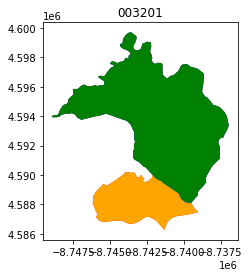

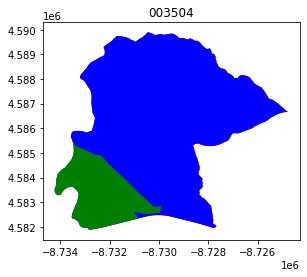

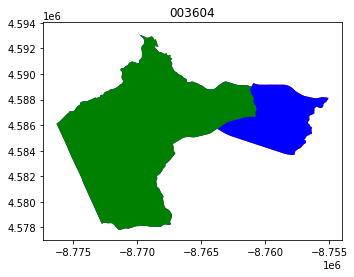

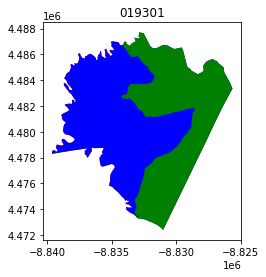

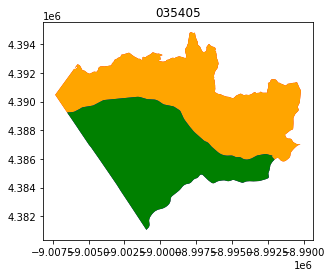

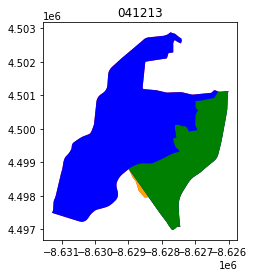

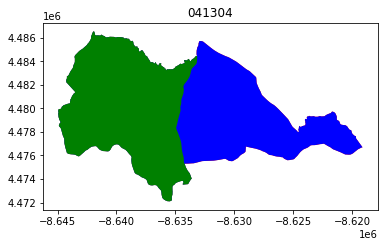

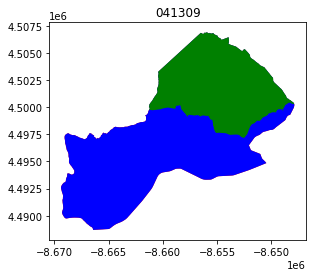

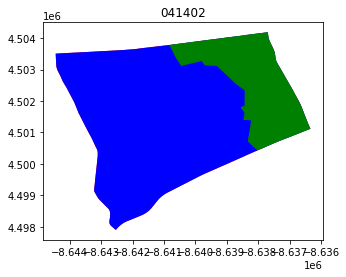

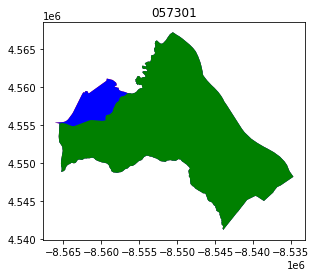

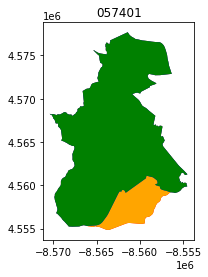

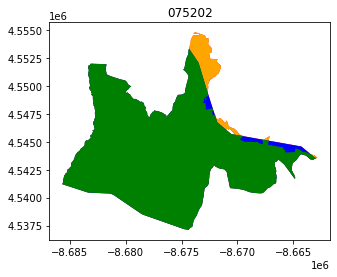

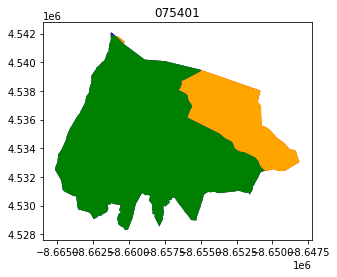

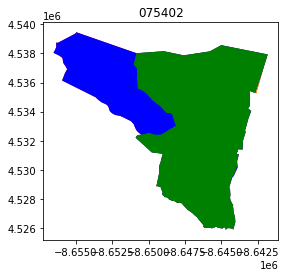

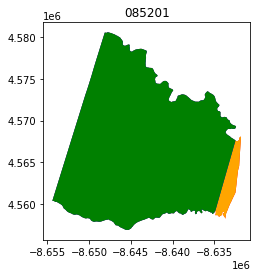

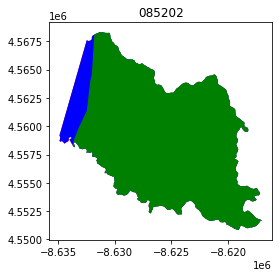

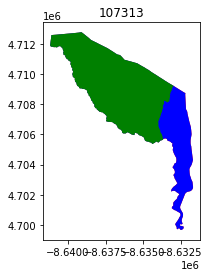

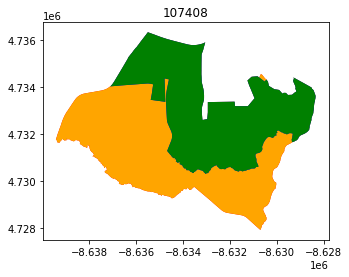

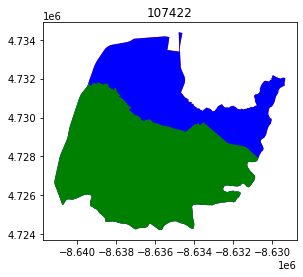

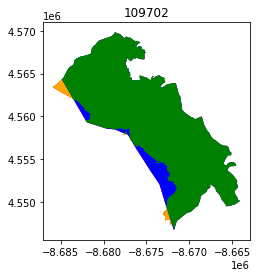

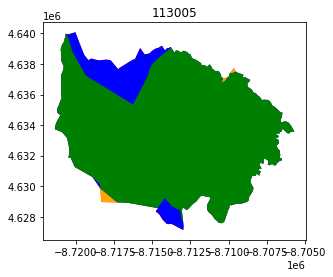

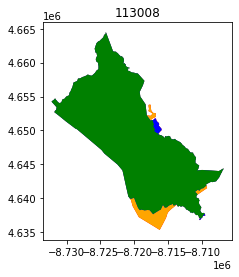

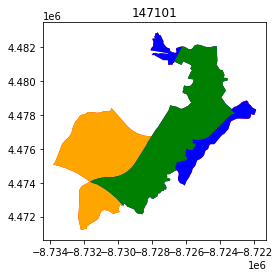

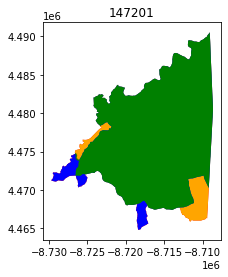

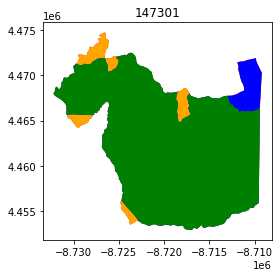

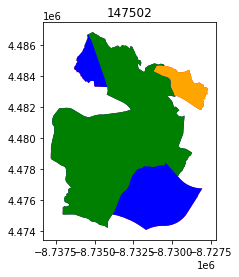

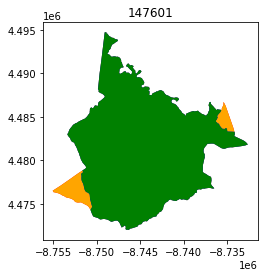

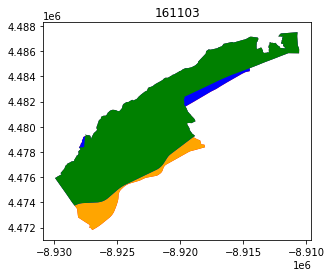

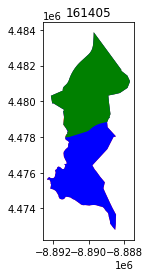

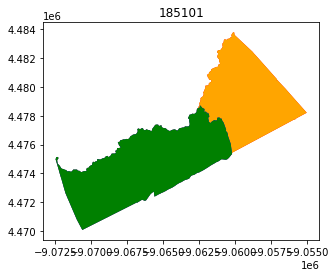

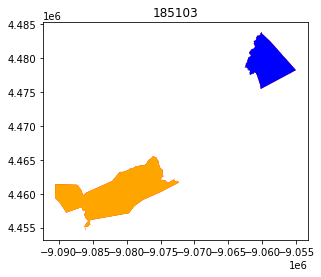

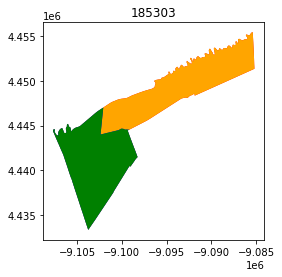

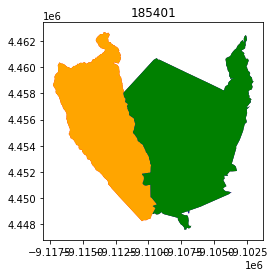

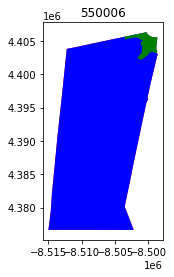

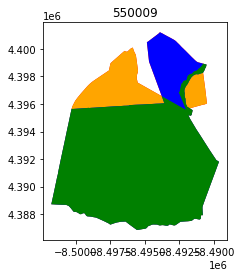

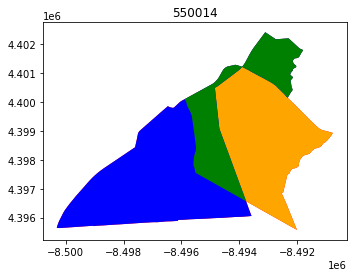

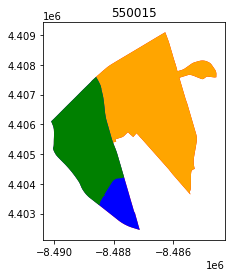

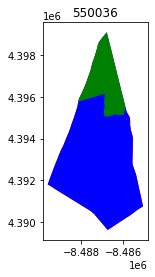

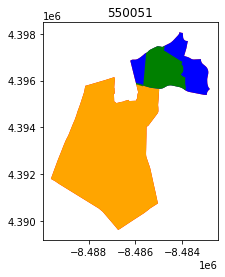

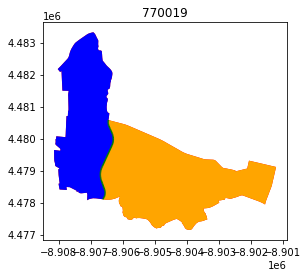

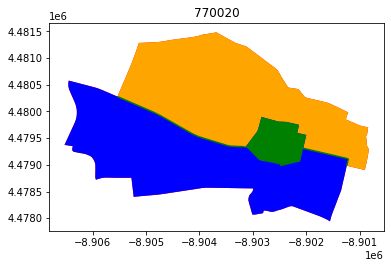

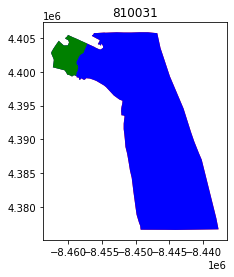

In [75]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"unique_id"]
        big_diff.loc[name]=area
        print(str(count)+") For SOURCE: " + name + ', VEST: '+ vest_geoms.at[i,"unique_id"]+ " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

Print out `unique_id` geometries that look similar above to see if can be combined somehow...

In [83]:
source_geoms[(source_geoms['unique_id']=='057301')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
444,453,057301,"POLYGON Z ((-8550401.998 4567109.752 0.000, -8...",51,057,01,O,Congressional District 1,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,1,None,N,51,057,000301,South Voting District,A,V2,None,None,None,None,South,90,N,None,G5240,51,057,000301,South Voting District,A,V2,None,None,None,None,South,90,N,None,G5240,057301,057301- 1,057301,Essex County,-,301 - South,950,Essex County301 - South,Essex County,057,377.0,655.0,5.0,3.0,360.0,666.0,0.0,368.0,662.0,1.0,057,32.0,0.799242,31.0,51.0,0.694644,50.0,0.0,0.2,0.0,1.0,0.666667,0.0,31.0,0.292508,31.0,50.0,0.730893,49.0,0.0,0.0,0.0,33.0,0.656553,32.0,48.0,0.072354,48.0,0.0,0.0,0.0,301,057301,ut,057301-ut,both,057,Essex County,000301,South,377.0,655.0,5.0,3.0,360.0,667.0,0.0,367.0,662.0,1.0,"POLYGON Z ((-76.94599 37.81637 0.00000, -76.94...",057301,ut,057301-ut


In [84]:
source_geoms[(source_geoms['unique_id']=='057401')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
445,454,057401,"POLYGON Z ((-8561366.745 4577610.274 0.000, -8...",51,057,01,O,Congressional District 1,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,1,None,N,51,057,000401,Central Voting District,A,V2,None,None,None,None,Central,90,N,None,G5240,51,057,000401,Central Voting District,A,V2,None,None,None,None,Central,90,N,None,G5240,057401,057401- 1,057401,Essex County,-,401 - Central,886,Essex County401 - Central,Essex County,057,416.0,545.0,10.0,0.0,412.0,555.0,0.0,406.0,557.0,0.0,057,35.0,0.117424,35.0,42.0,0.217559,42.0,1.0,0.36,0.0,0.0,0.0,0.0,36.0,0.762866,35.0,41.0,0.496233,41.0,0.0,0.0,0.0,36.0,0.068431,36.0,41.0,0.399568,40.0,0.0,0.0,0.0,401,057401,ra,057401-ra,both,057,Essex County,000401,Central,416.0,546.0,10.0,0.0,412.0,555.0,0.0,406.0,557.0,0.0,"POLYGON Z ((-76.98936 37.92087 0.00000, -76.98...",057401,ra,057401-ra


In [86]:
source_geoms[(source_geoms['unique_id']=='075401')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
790,800,075401,"POLYGON Z ((-8661255.505 4541945.358 0.000, -8...",51,075,07,O,Congressional District 7,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,7,None,N,51,075,000401,Shallow Well,A,00,None,None,None,None,Shallow Well,90,N,None,G5240,51,075,000401,Shallow Well,A,00,None,None,None,None,Shallow Well,90,N,None,G5240,075401,075401- 7,075401,Goochland County,-,401 - Shallow Well,934,Goochland County401 - Shallow Well,Goochland County,075,423.0,567.0,15.0,0.0,411.0,589.0,0.0,407.0,594.0,0.0,075,33.0,0.635079,32.0,34.0,0.540593,33.0,1.0,0.707071,0.0,0.0,0.0,0.0,32.0,0.863311,31.0,35.0,0.943265,34.0,0.0,0.0,0.0,32.0,0.136715,32.0,35.0,0.578231,34.0,0.0,0.0,0.0,401,075401,el,075401-el,both,075,Goochland County,000401,Shallow Well,423.0,567.0,15.0,0.0,411.0,589.0,0.0,407.0,594.0,0.0,"POLYGON Z ((-77.84031 37.66739 0.00000, -77.84...",075401,el,075401-el


In [87]:
source_geoms[(source_geoms['unique_id']=='075402')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
791,801,075402,"POLYGON Z ((-8641855.635 4537775.538 0.000, -8...",51,075,07,O,Congressional District 7,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,7,None,N,51,075,000402,Centerville,A,00,None,None,None,None,Centerville,90,N,None,G5240,51,075,000402,Centerville,A,00,None,None,None,None,Centerville,90,N,None,G5240,075402,075402- 7,075402,Goochland County,-,402 - Centerville,"1,567",Goochland County402 - Centerville,Goochland County,075,488.0,1178.0,15.0,0.0,462.0,1211.0,1.0,460.0,1210.0,3.0,075,38.0,0.65586,37.0,70.0,0.72416,69.0,1.0,0.707071,0.0,0.0,0.0,0.0,36.0,0.814698,35.0,72.0,0.841838,71.0,0.0,0.0,0.0,36.0,0.335913,36.0,70.0,0.517323,70.0,0.0,0.0,0.0,402,075402,ll,075402-ll,both,075,Goochland County,000402,Centerville,488.0,1178.0,15.0,0.0,462.0,1211.0,1.0,460.0,1210.0,3.0,"POLYGON Z ((-77.76286 37.70671 0.00000, -77.76...",075402,ll,075402-ll


In [88]:
source_geoms[(source_geoms['unique_id']=='085201')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
848,858,085201,"POLYGON Z ((-8643131.356 4578092.343 0.000, -8...",51,085,01,O,Congressional District 1,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,1,None,N,51,085,000201,Beaverdam Voting District,A,V2,None,None,None,None,Beaverdam,90,N,None,G5240,51,085,000201,Beaverdam Voting District,A,V2,None,None,None,None,Beaverdam,90,N,None,G5240,085201,085201- 1,085201,Hanover County,-,201 - Beaverdam,"1,414",Hanover County201 - Beaverdam,Hanover County,085,387.0,1080.0,22.0,0.0,373.0,1108.0,4.0,389.0,1095.0,1.0,085,21.0,0.509328,21.0,49.0,0.067466,49.0,1.0,0.107206,1.0,0.0,0.0,0.0,21.0,0.875363,20.0,50.0,0.351555,50.0,1.0,0.283019,0.0,22.0,0.102886,22.0,49.0,0.38625,49.0,0.0,0.015625,0.0,201,085201,da,085201-da,both,085,Hanover County,000201,Beaverdam,387.0,1081.0,22.0,0.0,372.0,1109.0,4.0,389.0,1096.0,1.0,"POLYGON Z ((-77.54678 37.91632 0.00000, -77.56...",085201,da,085201-da


In [89]:
source_geoms[(source_geoms['unique_id']=='085202')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
849,859,085202,"POLYGON Z ((-8631792.687 4568098.902 0.000, -8...",51,085,01,O,Congressional District 1,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,1,None,N,51,085,000202,Blunts Voting District,A,V2,None,None,None,None,Blunts,90,N,None,G5240,51,085,000202,Blunts Voting District,A,V2,None,None,None,None,Blunts,90,N,None,G5240,085202,085202- 1,085202,Hanover County,-,202 - Blunts,780,Hanover County202 - Blunts,Hanover County,085,308.0,505.0,10.0,0.0,307.0,512.0,0.0,301.0,519.0,0.0,085,17.0,0.101679,17.0,23.0,0.939397,22.0,0.0,0.527241,0.0,0.0,0.0,0.0,17.0,0.198452,17.0,23.0,0.272127,23.0,0.0,0.0,0.0,17.0,0.104141,17.0,23.0,0.418336,23.0,0.0,0.0,0.0,202,085202,nt,085202-nt,both,085,Hanover County,000202,Blunts,308.0,505.0,10.0,0.0,307.0,512.0,0.0,301.0,519.0,0.0,"POLYGON Z ((-77.56850 37.85653 0.00000, -77.54...",085202,nt,085202-nt


In [90]:
source_geoms[(source_geoms['unique_id']=='147101')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
1368,1381,147101,"POLYGON Z ((-8726234.696 4482028.983 0.000, -8...",51,147,05,O,Congressional District 5,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,5,None,N,51,147,000101,Farmville Voting District,A,V2,None,None,None,None,Farmville,90,N,None,G5240,51,147,000101,Farmville Voting District,A,V2,None,None,None,None,Farmville,90,N,None,G5240,147101,147101- 5,147101,Prince Edward County,-,101 - Farmville,660,Prince Edward County101 - Farmville,Prince Edward County,147,364.0,333.0,9.0,1.0,358.0,345.0,4.0,366.0,334.0,3.0,147,19.0,0.482948,19.0,23.0,0.599049,22.0,1.0,0.689655,0.0,0.0,0.0,0.0,19.0,0.989098,18.0,23.0,0.406923,23.0,2.0,0.6,1.0,19.0,0.277778,19.0,23.0,0.189126,23.0,1.0,0.2,0.0,101,147101,ll,147101-ll,both,147,Prince Edward County,000101,Farmville,364.0,332.0,9.0,1.0,358.0,345.0,4.0,366.0,334.0,3.0,"POLYGON Z ((-78.43793 37.25035 0.00000, -78.43...",147101,ll,147101-ll


In [91]:
source_geoms[(source_geoms['unique_id']=='147201')]

,index,unique_id,geometry_x,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,CDSESSN,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST_x,NAMELSAD_2,VTDI_x,LSAD_2,CHNG_TYPE_2,ORIG_NAME_x,ORIG_CODE_x,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC_x,STATEFP,COUNTYFP_x,VTDST_y,NAMELSAD,VTDI_y,LSAD,CHNG_TYPE,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,old_unique_id_x,id_w_cd_x,old_unique_id_w_cd,County/City,Ward,Pct,Total Votes Cast,join_id,LOCALITY_x,COUNTYFP_y,G17GOVDNOR_x,G17GOVRGIL_x,G17GOVLHYR_x,G17GOVOWRI_x,G17LTGDFAI_x,G17LTGRVOG_x,G17LTGOWRI_x,G17ATGDHER_x,G17ATGRADA_x,G17ATGOWRI_x,countyfp_cd,G17GOVDNOR_add,G17GOVDNOR_rem,G17GOVDNOR_floor,G17GOVRGIL_add,G17GOVRGIL_rem,G17GOVRGIL_floor,G17GOVLHYR_add,G17GOVLHYR_rem,G17GOVLHYR_floor,G17GOVOWRI_add,G17GOVOWRI_rem,G17GOVOWRI_floor,G17LTGDFAI_add,G17LTGDFAI_rem,G17LTGDFAI_floor,G17LTGRVOG_add,G17LTGRVOG_rem,G17LTGRVOG_floor,G17LTGOWRI_add,G17LTGOWRI_rem,G17LTGOWRI_floor,G17ATGDHER_add,G17ATGDHER_rem,G17ATGDHER_floor,G17ATGRADA_add,G17ATGRADA_rem,G17ATGRADA_floor,G17ATGOWRI_add,G17ATGOWRI_rem,G17ATGOWRI_floor,vtdst,old_unique_id_y,cd_x,id_w_cd_y,_merge,COUNTYFP,LOCALITY_y,VTDST,PRECINCT,G17GOVDNOR_y,G17GOVRGIL_y,G17GOVLHYR_y,G17GOVOWRI_y,G17LTGDFAI_y,G17LTGRVOG_y,G17LTGOWRI_y,G17ATGDHER_y,G17ATGRADA_y,G17ATGOWRI_y,geometry_y,old_unique_id,cd_y,id_w_cd
1369,1382,147201,"POLYGON Z ((-8724203.004 4482050.396 0.000, -8...",51,147,05,O,Congressional District 5,C2,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,116,5,None,N,51,147,000201,Lockett Voting District,A,V2,None,None,None,None,Lockett,90,N,None,G5240,51,147,000201,Lockett Voting District,A,V2,None,None,None,None,Lockett,90,N,None,G5240,147201,147201- 5,147201,Prince Edward County,-,201 - Lockett,853,Prince Edward County201 - Lockett,Prince Edward County,147,429.0,478.0,5.0,1.0,419.0,483.0,2.0,412.0,495.0,2.0,147,23.0,0.927759,22.0,32.0,0.513471,32.0,0.0,0.431034,0.0,0.0,0.0,0.0,22.0,0.23797,22.0,33.0,0.711538,32.0,1.0,0.8,0.0,22.0,0.666667,21.0,34.0,0.373592,34.0,0.0,0.2,0.0,201,147201,et,147201-et,both,147,Prince Edward County,000201,Lockett,429.0,479.0,5.0,1.0,419.0,484.0,2.0,412.0,496.0,2.0,"POLYGON Z ((-78.42056 37.23050 0.00000, -78.42...",147201,et,147201-et


In [77]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2447, 1)
1800 precincts w/ a difference of 0 km^2
522 precincts w/ a difference between 0 and .1 km^2
64 precincts w/ a difference between .1 and .5 km^2
19 precincts w/ a difference between .5 and 1 km^2
16 precincts w/ a difference between 1 and 2 km^2
17 precincts w/ a difference between 2 and 5 km^2
9 precincts w/ a difference greater than 5 km^2


# Election Results

In [92]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>1): #7/12/21 LF mod to be >1 instead of >0 to print fewer results
                    print(i, "{:.>72}".format(df.iloc[j]["unique_id"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_id"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_id"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    #print(diff_list)

In [93]:
validater_row(shp_gdfv_merge,column_list)


There are  2494  total rows
1601  of these rows have election result differences
893  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10
